# COMPLEX DYNAMICS & COMPUTATION

### Author: Marlin Figgins

### Date: March 15, 2020.

This jupyter notebook provides a guide for those interested in visualizing the Julia set of a complex function as well as the Mandelbrot set and Shift Locus in 3 dimensions. This originally was used as a supplement to a paper I wrote for MATH 276: Dynamical Systems taught by Amie Wilkins at the University of Chicago in Winter Quarter 2019.

In [1]:
## Importing necessary packages

%matplotlib inline
%alias_magic t timeit

## Visualization
import matplotlib.pyplot as plt 
from matplotlib import colors

## Computational Resources
import numpy as np
from numba import jit
import cmath

## Timing
import timeit

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


## Computing the Julia Set of a Complex Function

What is the Julia set? 

The Julia and Fatou sets give us a way of splitting the dynamics of a map f into a set of ‘niceness’ on which the dynamics of f are locally tame and a set of ‘chaos’ on which dynamics are sensitive to initial conditions. Heuristically, we will call the Fatou set the set of points on which the iterates of f are locally well behaved and the Julia set its complement. Knowing the shape of a given holomorphic function’s (filled) Julia set can help gain insight into a given functions dynamics. In the case of polynomials, the filled-in Julia set gives us a way of identifying points whose orbits remain bounded, localizing their dynamics. Knowing the actual shape of this set as well as its different connected components gives us an idea of how bounded orbits of points may permute or between the components of the Fatou set.

One way to identify whether a point is in the Julia set of a function $f$ is to track whether or not a given orbit of a point diverges to $\infty$ under a rational map $f$.

The function `julia_gen` below executes this process to determines where a point $c$ is in the Julia set $J(f)$ for any rational function $f$.

The function `julia_gen_set` applies this process across a range of values to compute $\mathcal{J(f)}$ and the function `julia_gen_image` produces an image of this.

### Computing Juia Set of $z+\frac{1}{z}$.

In [2]:
def julia_gen(f, z, maxiter): ## Iterate $f(z)$ until it escapes
    for n in range(maxiter):
        absz = abs(z)
        if absz > 4: ## If $f_c^n(z)$ escapes
            return n
        z=f(z)
    return 0

def julia_gen_set(f, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia_gen(f, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [3]:
def julia_gen_image(f, xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia_gen_set(f, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

In [4]:
## Other interesting examples
def f(z): 
    return z**2+ -0.73 - 0.2321*1j

def f(z): 
    return z**3+1/(z**3)

def f(z): 
    return 2*z**4-1

def f(z): 
    return (1j*z**5-1)/(z**5-1j)

def f(z): 
    return 0.75*z**4-1

def f(z): 
    return (z**2+1j)/(1-z**2)

In [5]:
%%t
julia_gen_set(f, maxiter=500, width=720, height=720, ymin=-2, ymax=2)

4min 31s ± 11.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Julia sets of the family $f_{c} = z^2 + c$.

This family of functions will become important when it comes to dealing with the Mandelbrot set $\mathcal{M}$

In [6]:
@jit
def julia(c, z, maxiter): ## Iterate $f_c(z)$ until it escapes
    for n in range(maxiter):
        if abs(z) > 4: ## If $f_c^n(z)$ escapes
            return n
        z = z*z + c
    return 0

@jit
def julia_set(creal, cimag, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia(creal+1j*cimag, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [7]:
def julia_image(creal, cimag ,xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia_set(creal, cimag, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

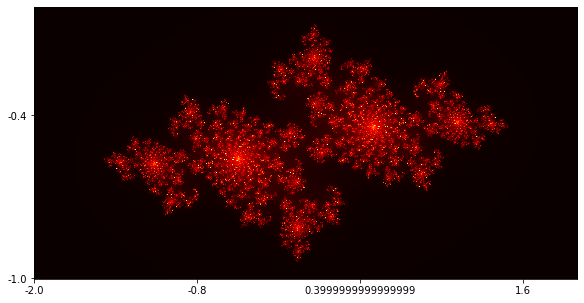

In [8]:
julia_image(creal = -0.73, cimag= -0.2321, maxiter=500, width=10, height=5)

In [9]:
%%t 
julia_set(creal = -0.73, cimag= -0.2321, maxiter=500, width=720, height=720, ymin=-2, ymax=2)

29.8 ms ± 447 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


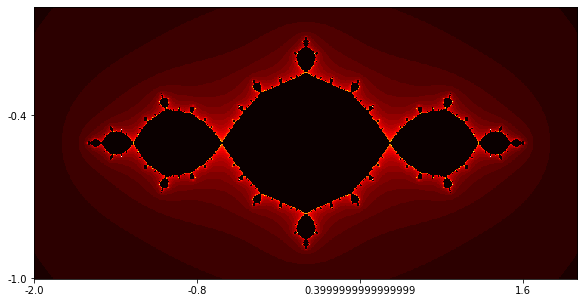

In [10]:
julia_image(creal = -1, cimag= 0, maxiter=200, width=10, height=5)

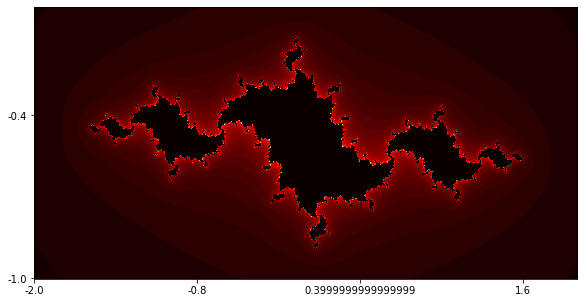

In [11]:
julia_image(creal = -1, cimag= 0.22, maxiter=1000, width=10, height=5)

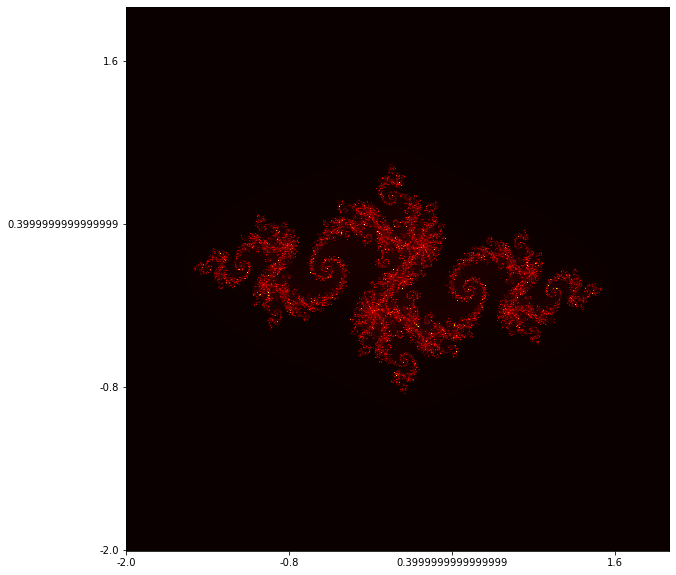

In [12]:
julia_image(creal = -.79, cimag= .15, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

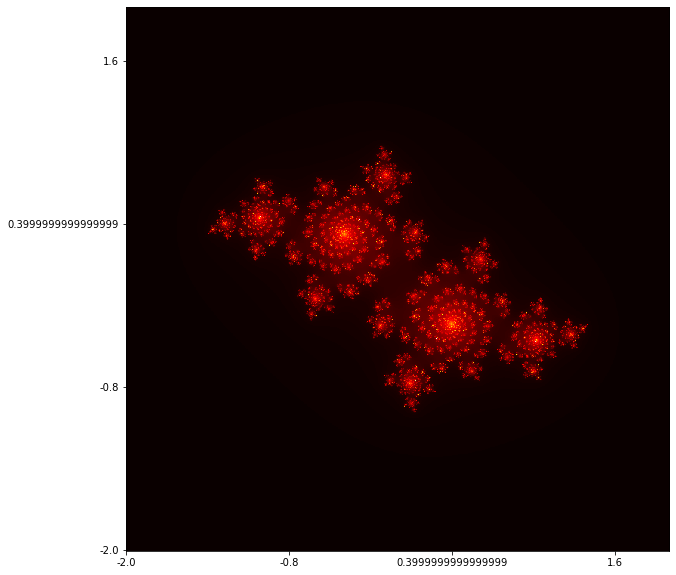

In [13]:
julia_image(creal = -.44, cimag= .59, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

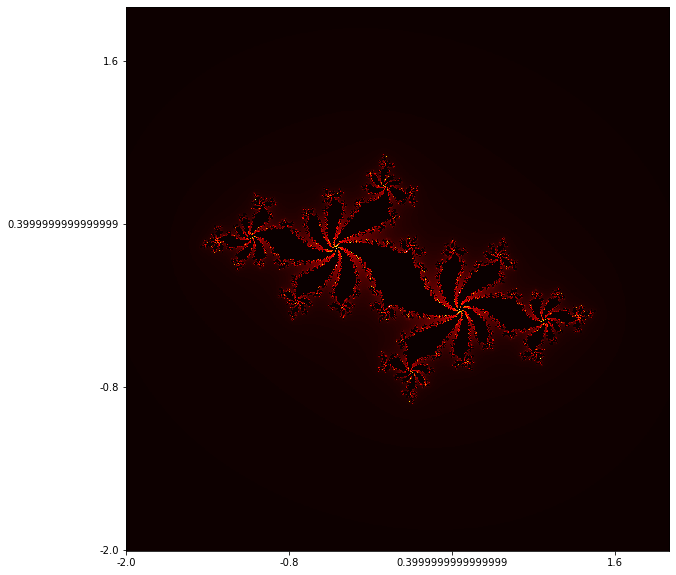

In [14]:
julia_image(creal = -0.62, cimag= 0.437, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

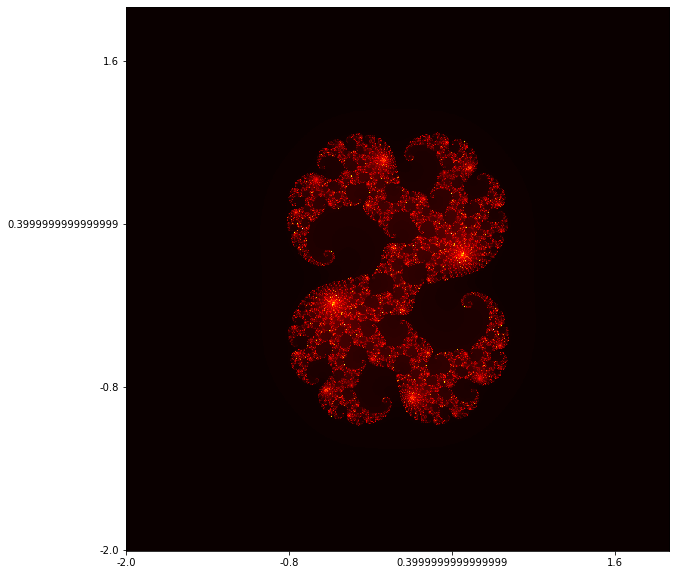

In [15]:
julia_image(creal = .28, cimag= .009, maxiter=1000, width=10, height=10, ymin=-2, ymax=2)

In [16]:
from ipywidgets import interact, fixed
interact(julia_image, creal=(-1,1,0.05), cimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(1000), width=fixed(10), height=fixed(10))

interactive(children=(FloatSlider(value=0.0, description='creal', max=1.0, min=-1.0, step=0.05), FloatSlider(v…

<function __main__.julia_image(creal, cimag, xmin=-2, xmax=2, ymin=-1, ymax=1, width=100, height=100, maxiter=100, cmap='hot')>

### Julia sets of the family $f_{a,b}(z)=z^3-3a^2z+b$.

This family of functions will become important when it comes to dealing with the Shift Locus $\mathcal{S}$

In [17]:
@jit
def julia3(a, b, z, maxiter):  # Iterate $f_{a,b}(z)=z^3-a^2z+b$ until it escapes
    Threea2 = 3*a**2  # Pre-allocate $3a^2$.
    for n in range(maxiter):
        if abs(z) > 4:  # If $f_{a,b}(z)$ escapes, return $n$.
            return n
        z = z*z*z - Threea2*z + b
    return 0


@jit
def julia3_set(a, b, width=10, height=10, maxiter=200, xmin=-2,xmax=2,ymin=-1,ymax=1):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $z=x+yi$.
        for j in range(height):
            escape[i,j] =julia3(a, b, x[i] + 1j*y[j], maxiter)
    return (x,y,escape)

In [18]:
def julia3_image(a=0, b=0 ,xmin=-2,xmax=2,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100,cmap='hot'):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = julia3_set(a, b, img_width, img_height, maxiter, xmin,xmax,ymin,ymax)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    ax.imshow(z.T,cmap=cmap,origin='lower') 

In [19]:
%%t
julia3_set(a=0.8, b=0 ,maxiter=500, width=720, height=720, ymin=-2, ymax=2)

159 ms ± 6.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


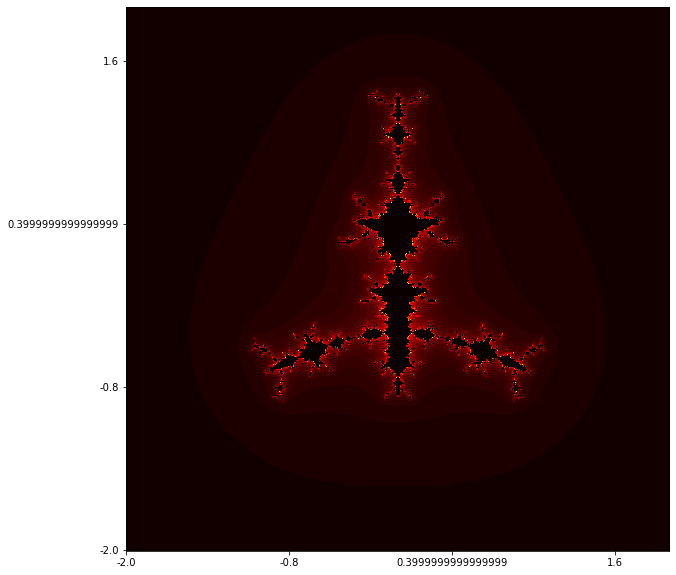

In [20]:
julia3_image(a=1j*0.39, b=1.11*1j,maxiter=500, width=10, height=10, ymin=-2, ymax=2)

# Computing the Mandelbrot Set

## Discrete escape algorithm

First up is the *discrete escape algoirthm*. Given the family of functions $f_c(z) = z^2 + c$, the Mandelbrot set $
\mathcal{M}$ consists of the set of points $c$ for which $0$ stays bounded under iteration by $f_c$ i.e.

\begin{equation}
\mathcal{M} = \{ c\in \mathbb{C} \mid f^n_c(0) \text{ is bounded for all } n\in \mathbb{N} \}
\end{equation}

It can be shown that any point orbit $f^n_c(0)$ which leaves the circle of radius two will escape to $\infty$, so we instead whether $\left| f^n_c(0) \right| > 2$ in order to confirm if the point in question is in the Mandelbrot set. We then use the minimum integer $n$ such that $f^n_c(0)$ escapes as the "escape time" of $c$.

The function `mandelbrot_d` below executes this process to determines where a point $c$ is in $\mathcal{M}$.

The function `mandelbrot_dset` applies this process across a range of values to compute $\mathcal{M}$ and the function `mandelbrot_d_image` produces an image of this.


*For computational speed, I will be using the [numba jit compiler](http://numba.pydata.org).*

In [21]:
@jit
def mandelbrot_d(z,maxiter,bailout): ## Iterate $f_c(0)$ until it escapes.
    c = z
    for n in range(maxiter):
        if abs(z) > bailout:  ## If $\abs{z}> bailout$
            return n
        z = z*z + c          
    return 0 

@jit
def mandelbrot_dset(xmin,xmax,ymin,ymax,width,height,maxiter):
    
    bailout=2 ## If abs(z)>2, then orbit escapes to $\infty$.
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width):  ## Loop over each $c=x+yi$.
        for j in range(height):
            escape[i,j] = mandelbrot_d(x[i] + 1j*y[j], maxiter, bailout)
    return (x,y,escape)

In [22]:
## Producing image

def mandelbrot_d_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=150,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_dset(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

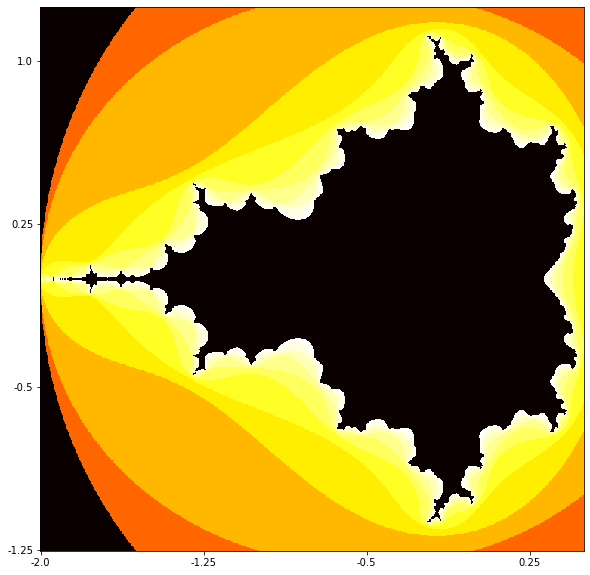

In [23]:
## After 10 iterations
mandelbrot_d_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=10, cmap='hot')

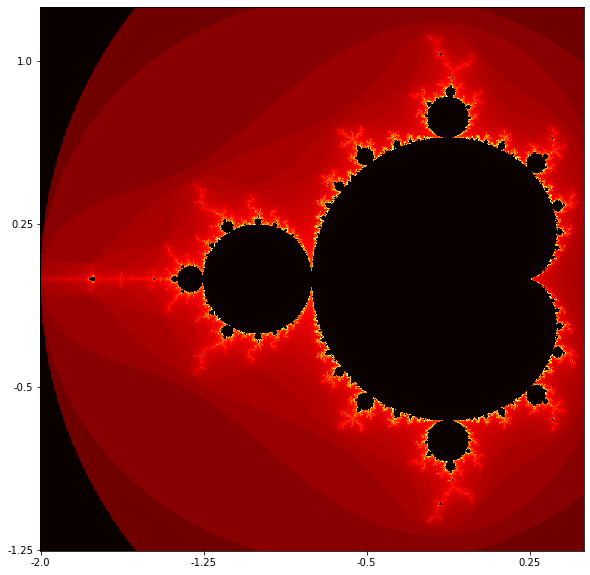

In [24]:
## 500 iterations
mandelbrot_d_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=500, cmap='hot')

In [25]:
## Timing for discrete escape algorithm
%%t
mandelbrot_dset(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=720, height=720, maxiter=500)

UsageError: Line magic function `%%t` not found.


What if we wanted to instead visualize how far off the iterates of a point go off using color instead of simply taking the integer of first escape? Then we need to output a float instead of an integer for each value $c\in \mathbb{C}$. This leads us to the continuous escape algorithm.

## Continuous Escape Rate Algorithm

The continuous escape rate algorithm follows much of the same structure as the discrete escape algorithm. The major difference is that it relies on an continuous estimate of the escape time

$$
\eta= n+\frac{\log\log b-\log \log \left| z_n\right|}{\log 2} \text{ where $b$ is the bailout radius}.
$$

This allows us to choose a much larger bailout radius in order to get a finer picture of which points escape and which do not.

In [ ]:
@jit
def mandelbrot_c(z,maxiter,bailout,bailout_est): # Iterate $f_c(0)$ until it escapes.
    c=z
    for n in range(maxiter):
        absz = abs(z)
        if absz > bailout:
            return n - np.log(np.log(absz))/np.log(2) + bailout_est  ## Continuous estimate of escape $n-\frac{\log\log\abs{z_n}}{}\log 2+b_est$.
        z = z*z + c
    return 0

@jit
def mandelbrot_c_set(xmin,xmax,ymin,ymax,width,height,maxiter):
    bailout= 2**30
    bailout_est = np.log(np.log(bailout))/np.log(2) 
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over each $c=x+yi$.
        for j in range(height):
            escape[i,j] = mandelbrot_c(x[i] + 1j*y[j], maxiter, bailout, bailout_est)
    return (x,y,escape)
    

In [ ]:
def mandelbrot_c_image(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=150,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = mandelbrot_c_set(xmin,xmax,ymin,ymax,img_width,img_height,maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 


In [ ]:
%%t
mandelbrot_c_set(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=720, height=720, maxiter=500)

Some plots given by the continuous escape rate algorithm!

In [ ]:
mandelbrot_c_image(xmin=-2.0,xmax=0.5,ymin=-1.25,ymax=1.25,width=10, height=10, maxiter=5014, cmap='hot')

In [ ]:
mandelbrot_c_image(xmin=-1.5,xmax=-1.3,ymin=-0.1,ymax=0.1,width=10, height=10, maxiter=5014, cmap='hot')

In [ ]:
mandelbrot_c_image(xmin=-1.462,xmax=-1.454,ymin=-0.004,ymax=0.004,width=10, height=10, maxiter=4014, cmap='hot')

In [ ]:
mandelbrot_c_image(xmin=-1.458,xmax=-1.4576,ymin=-0.0002,ymax=0.0002,width=10, height=10, maxiter=10000, cmap='hot')

# Visualizing the Shift Locus

We can try and adapt this to the next case with the reduced polynomial 
$z^3-a^2z+c$.

For shift locus (in case $d=3$), we need to identify critical points and see if they stay bounded. We can mimic the code for the polynomial $z^3+ az^2+bz+c$ (or alternatively the normal family $z^3-a^2z+b$), but we will need to employ a root finding algorithm on the derivative $3z^2+2az+b$ to find the critical points $z_1,z_2$ in the first place.

I will be using ... to find the roots, then checking to see if the orbit of one of the critical points stays within some bailout radius similar to the previous continuous case! Therefore, I will be finding points in the complement of the shift locus.

(Really need two colors, if $z_1$ escapes, if $z_2$ escapes)

In particular, I will be producing one dimensional slices of the shift locus using this method (identifying the space of degree 3 polynomials with $\mathbb{C}^2$. 

We will be using the normal form $f(z)=z^3-3a^2z+b$, where $f'(z)=3z^2-3a^2=3(z-a)(z+a)$ with roots $\pm a$. Therefore, our initial conditions will be 
$$z_1=a^3-3a^3+b=-2a^3+b$$

$$z_2=-a^3+3a^3+b=2a^3+b$$

In [ ]:
@jit
def Shift_Locus_3(a, b, maxiter=50, bailout=4): ## Shift Locus in 3 dimensions
    
    Twoa3=2*a**3   ## $2a^3$
    Threea2=3*a**2 ## $3a^2$
    
    z1= Twoa3+b      ## First Iterate starting from a
    z2= -1*Twoa3 + b ## First Iterate starting from -a
    
    for n in range(maxiter):
        absz1 = abs(z1)
        absz2 = abs(z2)
        
        if min(absz1,absz2) > bailout: ## If both $z_1,z_2$ escape bailout radius
            return n
        ## Iterate again using $f(z)=z^3-3a^2z+b$.
        z1=z1**3-z1*Threea2+ b  
        z2=z2**3-3*z2*Threea2+ b
        
    return 0
@jit
def Shift_Locus_3_a_Set(b=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,maxiter=50): 
    ## Compute $a$-space given a specific $b\in\bbC$.
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width): ## Loop over $a=x+iy$.
        for j in range(height):
            escape[i,j] = Shift_Locus_3(a=x[i] + 1j*y[j], b=b, maxiter=maxiter)
    return (x,y,escape)
@jit
def Shift_Locus_3_b_Set(a=0, xmin=-2,xmax=2,ymin=-2,ymax=2, width=10,height=10,maxiter=50): 
        ## Compute $b$-space given a specific $a\in\bbC$.

    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    escape = np.empty((width,height))
    
    for i in range(width):
        for j in range(height):
            escape[i,j] = Shift_Locus_3(a=a, b= x[i] + 1j*y[j], maxiter=maxiter)
    return (x,y,escape)

In [ ]:
def Shift_Locus_3_a_image(breal=0, bimag=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,\
                     maxiter=500,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = Shift_Locus_3_a_Set(breal+1j*bimag, xmin,xmax,ymin,ymax,img_width,img_height,maxiter=maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

    
def Shift_Locus_3_b_image(areal=0, aimag=0, xmin=-2,xmax=2,ymin=-2,ymax=2,width=10,height=10,\
                     maxiter=100,cmap='hot',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x,y,z = Shift_Locus_3_b_Set(areal+1j*aimag, xmin,xmax,ymin,ymax,img_width,img_height,maxiter=maxiter)
    
    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    
    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T,cmap=cmap,origin='lower',norm=norm) 

In [ ]:
%%t
Shift_Locus_3_a_Set(xmin=-2.0,xmax=2,ymin=-2,ymax=2 ,width=720, height=720, maxiter=500)

In [ ]:
%%t
Shift_Locus_3_b_Set(xmin=-2.0,xmax=2,ymin=-2,ymax=2 ,width=720, height=720, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=-0.2, aimag= 0.2, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0, aimag= 0.2, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0.2, aimag= 0.2, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=-0.2, aimag= 0, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0, aimag= 0, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0.2, aimag= 0, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=-0.2, aimag= -0.2, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0, aimag= -0.2, maxiter=500)

In [ ]:
Shift_Locus_3_b_image(areal=0.2, aimag= -0.2, maxiter=500)

### Widget for moving through $a$ space!

In [ ]:
from ipywidgets import interact, fixed
interact(Shift_Locus_3_b_image, areal=(-1,1,0.05), aimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(500), width=fixed(10), height=fixed(10), gamma=fixed(0.3))

In [ ]:
Shift_Locus_3_a_image(breal=-0.2, bimag=0.2, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=0, bimag=0.2, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=0.2, bimag=0.2, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=-0.2, bimag=0, maxiter=500)

In [ ]:

Shift_Locus_3_a_image(breal=0, bimag=0, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=0.2, bimag=0, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=-0.2, bimag=-.2, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=0, bimag=-0.2, maxiter=500)

In [ ]:
Shift_Locus_3_a_image(breal=0.2, bimag=-0.2, maxiter=500)

### Widget for moving through $b$ space!

In [ ]:
from ipywidgets import interact, fixed
interact(Shift_Locus_3_a_image, breal=(-1,1,0.05), bimag=(-1,1,0.05),  cmap=fixed('hot'),xmin=fixed(-2),xmax=fixed(2),ymin=fixed(-2),ymax=fixed(2) , maxiter=fixed(500), width=fixed(10), height=fixed(10), gamma=fixed(0.3))

# Newton's Method for Finding Basins of Attraction

We will be basing this off of the Newton's function

$$ N(x)=x-\frac{f(x)}{f'(x)} $$.

Given a function $f$ and $x\in \mathbb{C}$, we will iterate the point $x$ using $N$ until our point is within some tolerance of a root! 



In [ ]:
### Case z^5-1
@jit
def Newtons_Meth_gen(funcvalue, Dfvalue, x, roots, tolerance,maxiter=15):
    for i in range(maxiter):
        x=x-funcvalue/Dfvalue 
        for root in roots:
            if abs(x-root)< tolerance:
                return root
            


In the case of $f(z)=z^5-1$, we have 
$$N(z)=z-\left(\frac{z^5-1}{5z^4}\right)=\frac{4}{5}z+\frac{1}{5z^4},$$
where the roots of $f$ are given by the $5$th roots of unity.

In [ ]:
def Newtons_Meth5(z, roots, tolerance,maxiter=100):
    for n in range(maxiter):
        z=z-(z**5-1)/(5*z**4)
        for k in range(5):
            if abs(z-roots[k])< tolerance:
                return k
            
def Newtons_Set(xmin=-2,xmax=2,ymin=-1,ymax=1,width=20,height=20, maxiter=500):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    rootclose = np.empty((width,height))
    
    roots=np.roots([1, 0, 0, 0, 0, -1])
    tolerance=0.1
    
    for i in range(width):
        for j in range(height):
            rootclose[i,j] = Newtons_Meth5(x[i]+1J*y[j], roots, tolerance, maxiter=maxiter)  
    return (x,y,rootclose)

In [ ]:
@jit
def Newtons_Meth(z, roots, tolerance,maxiter=100):
    for n in range(maxiter):
        z=z-(z**5-1)/(5*z**4)
        for k in range(5):
            if abs(z-roots[k])< tolerance:
                return k
            
def Newtons_Set(xmin=-2,xmax=2,ymin=-1,ymax=1,width=20,height=20, maxiter=500):
    
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    rootclose = np.empty((width,height))
    
    roots=np.roots([1, 0, 0, -1])
    tolerance=0.1
    
    for i in range(width):
        for j in range(height):
            rootclose[i,j] = Newtons_Meth(x[i]+1J*y[j], roots, tolerance, maxiter=maxiter)  
    return (x,y,rootclose)

In [ ]:
def Newtons_Imag(xmin=-1,xmax=1,ymin=-1,ymax=1,width=100,height=100,\
                     maxiter=100):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
           
    x,y,z = Newtons_Set(xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,width=img_width,height=img_height, maxiter=maxiter)


    fig, ax = plt.subplots(figsize=(width, height),dpi=72)
    ticks = np.arange(0,img_width,3*dpi)
    x_ticks = xmin + (xmax-xmin)*ticks/img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax-ymin)*ticks/img_width
    plt.yticks(ticks, y_ticks)
    ax.imshow(z.T, cmap='hot',origin='lower') 

In [ ]:
Newtons_Imag(xmin=-1,xmax=1,ymin=-1,ymax=1,width=11,height=11, maxiter=200)